# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy some shares.
       If it falls further, buy some more, etc...
    3. If the SPY closes at a X-day high, sell your entire long position.
    
    (optimize for number of positions)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Define max number of positions to scale into

In [5]:
pos = range(1, 10)
pos = [str(p) for p in pos]

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for p in pos:
    print("{0}".format(p), end=" ")
    strategies[p] = strategy.Strategy(symbol, capital, start, end, period=period, max_positions=int(p))
    strategies[p].run()
    strategies[p].tlog, strategies[p].dbal = strategies[p].get_logs()
    strategies[p].stats = strategies[p].get_stats()

1 2 3 4 5 6 7 8 9 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points',
           'pct_profitable_trades')

df = strategy.summary(strategies, metrics)
df

,1,2,3,4,5,6,7,8,9
annual_return_rate,7.20,6.30,5.48,5.21,4.99,4.46,3.94,3.46,3.11
max_closed_out_drawdown,-14.63,-18.58,-21.96,-23.56,-18.74,-15.45,-13.98,-13.94,-13.52
drawdown_annualized_return,-2.03,-2.95,-4.00,-4.52,-3.75,-3.46,-3.55,-4.03,-4.35
drawdown_recovery,-1.84,-0.13,-0.13,-0.13,-0.13,-0.13,-0.18,-0.18,-0.18
best_month,12.88,10.33,10.41,12.35,9.26,7.64,8.47,7.98,8.15
worst_month,-13.54,-17.67,-21.10,-22.93,-18.21,-14.99,-12.66,-12.13,-12.24
sharpe_ratio,0.75,0.68,0.62,0.61,0.64,0.64,0.61,0.58,0.56
sortino_ratio,0.55,0.52,0.46,0.46,0.49,0.49,0.46,0.43,0.41
monthly_std,2.10,2.02,1.93,1.86,1.69,1.52,1.40,1.29,1.20
pct_time_in_market,29.68,35.82,39.62,42.40,43.92,44.70,45.19,45.58,45.79


Bar graphs

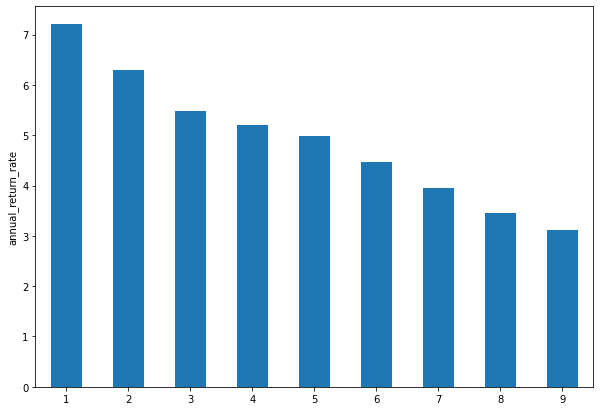

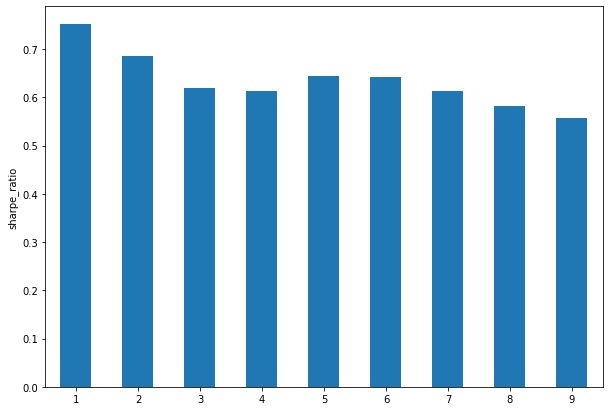

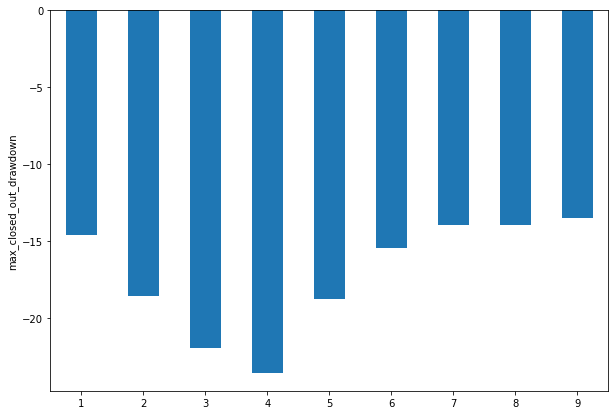

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[pos[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-07-23 00:00:00 SELL 215 SPY @ 322.28


Equity curve

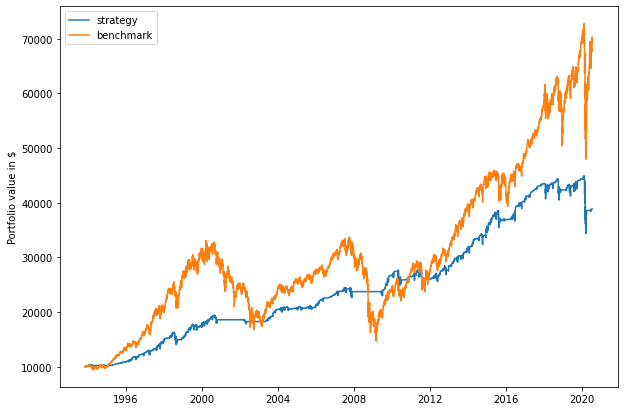

In [10]:
pf.plot_equity_curve(strategies['4'].dbal, benchmark=benchmark.dbal)